In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qalma.model import build_spin_chain
from qalma.scalarprod import fetch_covar_scalar_product
from qalma.operators.states import GibbsProductDensityOperator
from qalma.evolution import qutip_me_solve, heisenberg_solve
from qalma.operators.states.meanfield import variational_quadratic_mfa
ZEEMAN = 10
BETA = 10.

# Build a spin chain with a Heisenberg antiferromagnetic coupling:
SYSTEM = build_spin_chain(6)
# Observables
SX_locals = [SYSTEM.site_operator(f"Sx@{pos}") for pos in SYSTEM.sites]
SY_locals = [SYSTEM.site_operator(f"Sy@{pos}") for pos in SYSTEM.sites]
SZ_locals = [SYSTEM.site_operator(f"Sz@{pos}") for pos in SYSTEM.sites]
SX_TOTAL = sum(SX_locals)
SZ_TOTAL = SYSTEM.global_operator("Sz")

# Hamiltonian:
H=SYSTEM.global_operator("Hamiltonian") + ZEEMAN * SZ_TOTAL

# Initial state
RHO_0 = GibbsProductDensityOperator(BETA*SX_locals[1])


TS=np.linspace(0,10,100)

In [4]:
# Observables to be considered
obs = {"Sx_1":SX_locals[1],"Sx_0":SX_locals[0],"Sx_2":SX_locals[2],"Sx_3":SX_locals[3]}


sp_hs = lambda x,y : np.real((x*y).tr())
# Exact (qutip) evolution
print("solving qutip evolution")
result_qutip = qutip_me_solve(H, RHO_0, TS, e_ops=obs)
# Truncated Heisenberg evolution using the covariance scalar product 
print("solving heisenberg evolution, covariance sp")
%timeit result_heisenberg_cov = heisenberg_solve(H, RHO_0, TS, e_ops=obs, deep=6)
# Truncated Heisenberg evolution using the HS scalar product
print("solving heisenberg evolution, HS sp")
%timeit result_heisenberg_hs = heisenberg_solve(H, RHO_0, TS, e_ops=obs, deep=6, sp=sp_hs)
# Truncated Heisenberg evolution using the mean field state



solving qutip evolution
solving heisenberg evolution, covariance sp
38.4 s ± 1.53 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
solving heisenberg evolution, HS sp
25.1 s ± 96.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


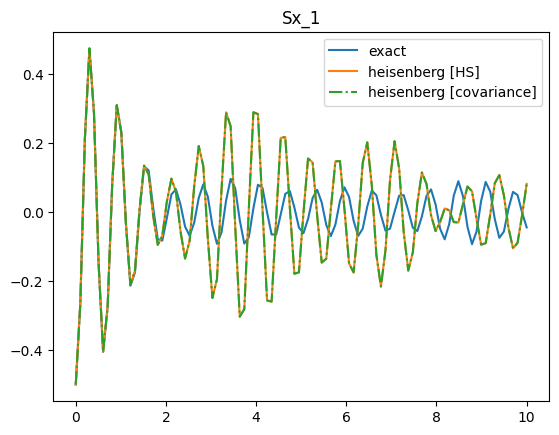

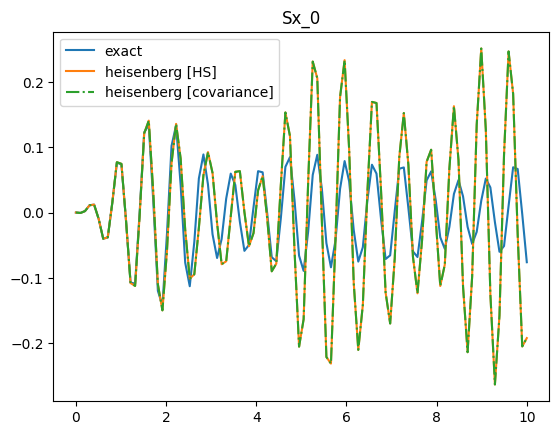

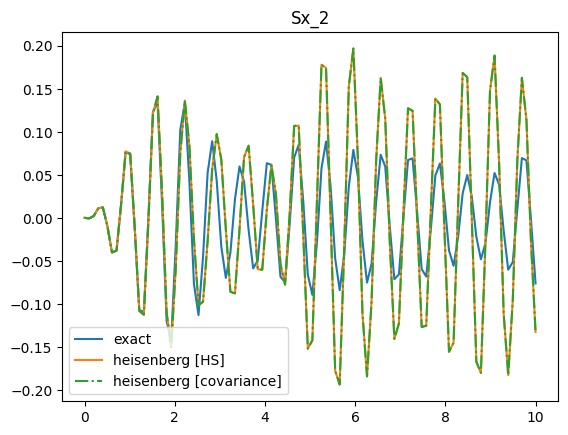

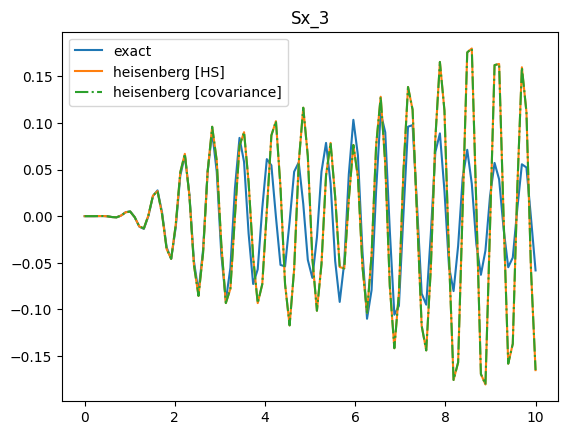

In [6]:
for key in obs:
    plt.plot(TS, result_qutip[key],label="exact")
    plt.plot(TS, result_heisenberg_hs[key],label="heisenberg [HS]")
    plt.plot(TS, result_heisenberg_cov[key],label="heisenberg [covariance]",ls="-.")
    plt.legend()
    plt.title(key)
    plt.show()
    